# Predicting whether a Credit card transaction is Fraudulent or Normal using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of credit card fraud detection classification.


# Problem statement

In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a transaction to predict whether it is fraudulent or normal

In a statement, we are given the certain parameters of bank account we have to predict whether the transaction is legit or fraudulent..

# Preparing the tools

The libraries we use in this project are-
* Pandas
* Numpy
* Matplotlib
* Sci-kit learn

In [1]:
#Importing all the tools which are required.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Importing modelling tools.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#tool to split training and testing data.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#importing the evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import f1_score, recall_score

## Preparing the Data

We have taken this dataset from kaggle .

The datbase contains 31 columns of different features like Time, amount and other PCA(principal Component Analysis)

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are various features like Time, amount and the dependent variable is Class(in which we have to predict whether or not the transaction is Fraudulent or legit)

## Loading the data

In [2]:
#Reading the data.
df = pd.read_csv("creditcard.csv")
df.shape #(rows, columns)

(284807, 31)

## Data Exploration(Exploratory data analysis or EDA)

* In this section we are going to find more about the data and become a subject matter expert on the dataset we're working with.

* we do exploratory data analysis (EDA) to start building an intuition of the dataset.


* Which type of question we're trying to solve? -> classification problem(In this case)
* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do we deal with it?
* Where are the outliers and why should we care about them?
* How can we add, change or remove features to get more out of our data?

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Distribution of legit and Fraudulent transactions
# 1 -> Fraudulent ransaction
# 0 -> Legit transaction
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

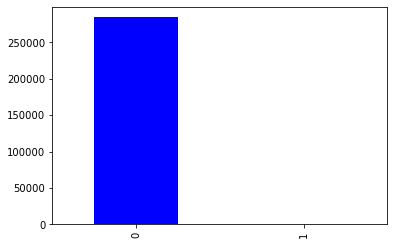

In [5]:
#plotting the graph of the data Class
df["Class"].value_counts().plot(kind="bar", color=["blue", "red"])

* As we can see from the data that only 492 transactions are fraud therefore it is negligible compared to the fair transactions therefore the data is not visible in our bar graph. Therefore, This data is called imbalanced data because of the above reason..

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isna().sum() #To check if data contains any missing value.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* From this we got all the information of our data(i.e about the datatypes) and we can see that there are no missing data in our dataset and therefore no feature Engineering is required.

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* This function returns the count, mean, standard deviation maximum values and percentile from our dataset/data of each individual data.

Lets explore data in pie chart

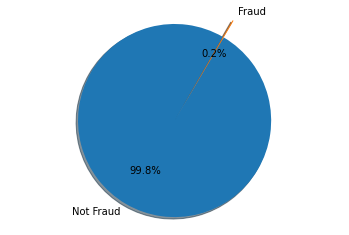

In [9]:
#visualizing in pie chart
labels = 'Not Fraud', 'Fraud'
explode = (0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(df['Class'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

From here we observe that the data is highly imbalanced.We will manage this afterwards

In [10]:
# Class Frequency according to time
df.V1.value_counts()

 2.055797    77
 1.245674    77
 2.053311    62
 1.302378    60
 2.040211    53
             ..
-0.069327     1
-1.619420     1
 1.174923     1
 2.157306     1
 2.287784     1
Name: V1, Length: 275663, dtype: int64

In [11]:
pd.crosstab(df.V1, df.Class)

Class,0,1
V1,,
-56.407510,1,0
-46.855047,1,0
-41.928738,1,0
-40.470142,1,0
-40.042537,1,0
...,...,...
2.430507,1,0
2.439207,1,0
2.446505,1,0


* From all these informations we can say that the data we got is actually Unbalanced.Usually, An unbalanced target column, meaning some classes have far more samples, can be harder to model than a balanced set.Therefore, we can't feed this type of data into our machine learning model because it cannot recognize the fraudulent data as it is very less compared to the legit data.So, to overcome this we will sample our data which will be done later

<AxesSubplot:ylabel='Frequency'>

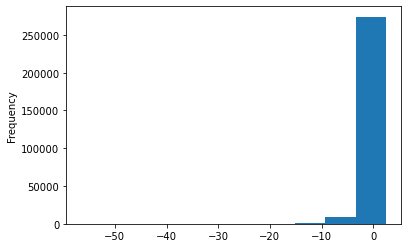

In [12]:
df.V1.plot.hist()

In [13]:
#comparing amount with class
pd.crosstab(df.Amount, df.Class)

Class,0,1
Amount,,
0.00,1798,27
0.01,713,5
0.02,85,0
0.03,3,0
0.04,11,0
...,...,...
11898.09,1,0
12910.93,1,0
18910.00,1,0


In [14]:
# comparing the values for both the transactions
df.groupby('Class').mean() #It compares the mean of classes for all columns based on 0 and 1...

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


* In the above cell we can see a wide difference between two transactions and this difference is important to us as this is how our model can predict whether our transacyion is legit or not

<AxesSubplot:ylabel='Frequency'>

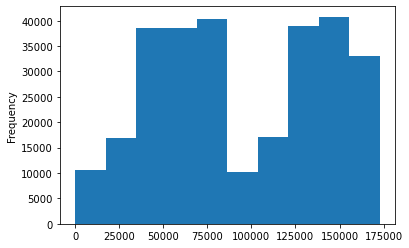

In [15]:
df.Time.plot.hist()

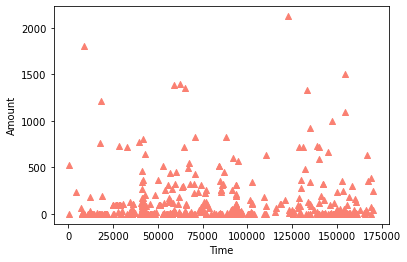

In [16]:
#plotting the scatterplot values for fraud transaction
plt.scatter(df.Time[df.Class == 1], 
            df.Amount[df.Class == 1], 
            marker = '^',
            c = "salmon")
plt.xlabel('Time')
plt.ylabel('Amount');

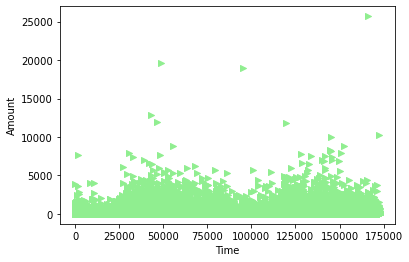

In [17]:
#plotting the scatterplot values for legit transaction
plt.scatter(df.Time[df.Class==0], 
            df.Amount[df.Class==0],
            marker = '>',
            c="lightgreen")
plt.xlabel('Time')
plt.ylabel('Amount');


In [18]:
# Separarting the data for separate class analysis
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

#lets look at the shape of the above data
normal.shape, fraud.shape

((284315, 31), (492, 31))

In [19]:
# statistical measures of the data separately 
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

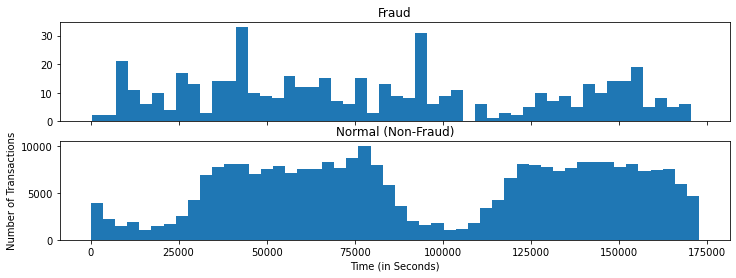

In [21]:
# now checking Time value in case of Fraud and Normal Transaction compared according to Number of transactions.
fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

axis_1.hist(fraud.Time, bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(normal.Time, bins = bins)
axis_2.set_title('Normal (Non-Fraud)')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()
# We can see that in both cases , feature time looks similar. but if we look carefully, we can see that Normal 
# transactions are kind of uniformly distributed whereas the shape of Fraud transaction is not

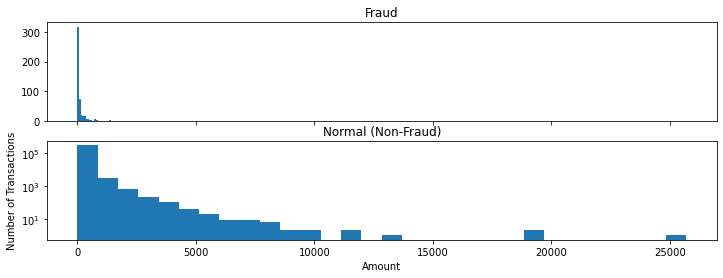

In [22]:
# now checking Amount in case of Fraud and Normal Transaction compared according to Number of transactions.

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

axis_1.hist(fraud.Amount[df.Class == 1], bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(normal.Amount[df.Class == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale("log")
plt.show()

# we can see here that fraud transactions are of smaller amount. but this cant be used solely because normal transactions 
# too have a lot of transactions of smaller amount. so this kind of helps in a sense that we can say that if the amount
# is not large then its 'probably' not a fraud transaction, but obviously, fraud and normal transactions cant be 
# distinguished only according to amount.

## Correlation matrix

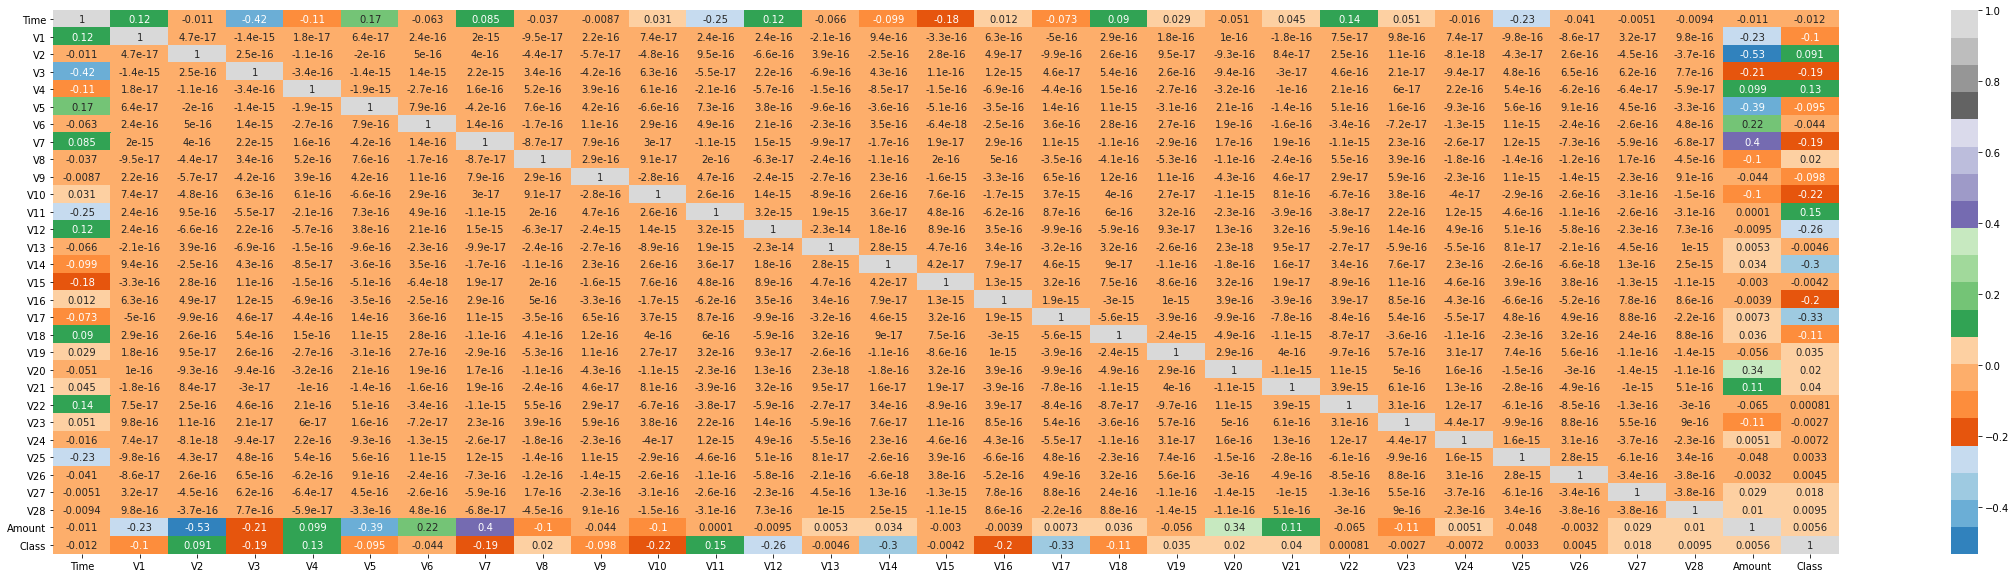

In [23]:
# checking the correlation matrix of both combined fraud and normal transactions
plt.figure(figsize = (40,10))
sns.heatmap(df.corr(), annot = True, cmap="tab20c")
plt.show()

Now, Enough of Exploratory data analysis(EDA) we have looked into few curves and figured out how all the data columns are related to each other and we have also observed which features contributes the most for the right values of the classes through confusion matrix

Now we will sample our data, As already discussed above the data which we got is actually imbalanced dataset(as there is very less fraudulent data compared to the legit data , and for this reason our model cannot recognise the fraudulent data), so to optimise/overcome this we will sample(Undersampling) our data..

we can undersample our data by building a dataset which contains equal ditributions of Normal and fraudulent transactions that means we will take any random data from the normal transaction(which contains same rows as fraud transactions) and then we will join/concatenate the datas and then perform train test split and other works on it..

### Undersampling the data

In [24]:
#Lets check our fraud data
fraud.shape

(492, 31)

so we need 492 random data from the normal transaction set as well..

In [25]:
#Sampling our random data from normal transaction
normal_sample = normal.sample(n=492) 

In [26]:
# so our data is sampled now so lets concatenate our data
new_data = pd.concat([normal_sample, fraud], axis=0)

In [27]:
#lets check our new data
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
158037,110829.0,2.127946,0.179753,-2.189511,0.125166,0.835948,-1.246992,0.681395,-0.595654,1.498708,...,-0.012414,0.283045,-0.033538,0.572355,0.453356,0.176771,-0.121577,-0.077481,20.37,0
246632,153252.0,-0.520715,-0.177780,0.544353,-0.618474,0.537042,-0.965691,0.714617,-0.057018,0.474255,...,-0.069440,-0.367536,0.088954,-0.201488,0.215760,-0.068404,-0.075772,-0.019904,80.00,0
75905,56302.0,1.151128,-0.082384,1.270232,1.350025,-1.043314,-0.216287,-0.605943,0.129997,0.995549,...,-0.069918,-0.029885,0.003545,0.377232,0.391446,-0.407028,0.067863,0.036976,9.99,0
236346,148770.0,1.993451,-0.527785,-0.277094,0.483470,-0.892861,-0.547632,-0.719819,0.004556,1.426141,...,0.141505,0.582788,0.156875,-0.079033,-0.296208,0.578742,-0.026094,-0.049971,11.50,0
259269,159039.0,1.982780,-0.252463,-0.724556,0.137818,-0.471947,-0.969843,-0.191855,-0.056126,0.467028,...,-0.410893,-1.313772,0.561030,-0.008573,-0.811124,-0.001203,-0.081215,-0.058634,12.06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [28]:
# lets check the value counts of 0 and 1 whether its equally sampled or not
new_data.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

Now we can see that our data is sampled equally i.e(1 -> 492, 0 -> 492) now, what we do is we will split our data into training and testing split so that we can train our data in training split and test our data in testing split....

### Splitting the data into training and testing split

We're trying to predict our Class variable using all of the other variables.

To do this, we'll split the Class variable from the rest.

In [29]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
158037,110829.0,2.127946,0.179753,-2.189511,0.125166,0.835948,-1.246992,0.681395,-0.595654,1.498708,...,-0.012414,0.283045,-0.033538,0.572355,0.453356,0.176771,-0.121577,-0.077481,20.37,0
246632,153252.0,-0.520715,-0.177780,0.544353,-0.618474,0.537042,-0.965691,0.714617,-0.057018,0.474255,...,-0.069440,-0.367536,0.088954,-0.201488,0.215760,-0.068404,-0.075772,-0.019904,80.00,0
75905,56302.0,1.151128,-0.082384,1.270232,1.350025,-1.043314,-0.216287,-0.605943,0.129997,0.995549,...,-0.069918,-0.029885,0.003545,0.377232,0.391446,-0.407028,0.067863,0.036976,9.99,0
236346,148770.0,1.993451,-0.527785,-0.277094,0.483470,-0.892861,-0.547632,-0.719819,0.004556,1.426141,...,0.141505,0.582788,0.156875,-0.079033,-0.296208,0.578742,-0.026094,-0.049971,11.50,0
259269,159039.0,1.982780,-0.252463,-0.724556,0.137818,-0.471947,-0.969843,-0.191855,-0.056126,0.467028,...,-0.410893,-1.313772,0.561030,-0.008573,-0.811124,-0.001203,-0.081215,-0.058634,12.06,0


In [30]:
X = new_data.drop("Class", axis=1) #Everything except Class

y = new_data.Class #only Class

In [31]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
158037,110829.0,2.127946,0.179753,-2.189511,0.125166,0.835948,-1.246992,0.681395,-0.595654,1.498708,...,-0.221842,-0.012414,0.283045,-0.033538,0.572355,0.453356,0.176771,-0.121577,-0.077481,20.37
246632,153252.0,-0.520715,-0.177780,0.544353,-0.618474,0.537042,-0.965691,0.714617,-0.057018,0.474255,...,0.046702,-0.069440,-0.367536,0.088954,-0.201488,0.215760,-0.068404,-0.075772,-0.019904,80.00
75905,56302.0,1.151128,-0.082384,1.270232,1.350025,-1.043314,-0.216287,-0.605943,0.129997,0.995549,...,-0.176780,-0.069918,-0.029885,0.003545,0.377232,0.391446,-0.407028,0.067863,0.036976,9.99
236346,148770.0,1.993451,-0.527785,-0.277094,0.483470,-0.892861,-0.547632,-0.719819,0.004556,1.426141,...,-0.247968,0.141505,0.582788,0.156875,-0.079033,-0.296208,0.578742,-0.026094,-0.049971,11.50
259269,159039.0,1.982780,-0.252463,-0.724556,0.137818,-0.471947,-0.969843,-0.191855,-0.056126,0.467028,...,-0.257683,-0.410893,-1.313772,0.561030,-0.008573,-0.811124,-0.001203,-0.081215,-0.058634,12.06


In [32]:
y.head()

158037    0
246632    0
75905     0
236346    0
259269    0
Name: Class, dtype: int64

In [33]:
# Now lets split our data into train and test data.. we will be taking 80% data on the training data and 20%
# data on the testing data
np.random.seed(42) # Random seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# looking at the size of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((787, 30), (787,), (197, 30), (197,))

In [35]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
258403,158638.0,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,...,3.136338,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33
255257,157139.0,0.412406,0.670973,-0.613035,-0.389548,0.429526,-0.237394,-0.520405,-2.928694,-0.296535,...,0.623364,-1.572601,-0.527239,-0.103350,-0.625461,0.494593,0.247957,-0.036392,0.147128,44.99
213116,139117.0,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30
9509,14152.0,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00


In [36]:
np.array(y_train[:70]), len(y_train)

(array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        0, 1, 0, 1], dtype=int64),
 787)

In [37]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.0
144263,85982.0,-0.591776,0.488047,1.904447,0.430275,0.492191,-0.646362,0.720185,-0.192084,0.220844,...,-0.087302,0.018675,0.335267,-0.236607,0.394413,0.020226,-0.514748,-0.025463,-0.074144,1.0
111690,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,1.003350,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.9
245077,152598.0,0.631670,-4.507367,-2.518337,-1.687783,-0.132850,4.369624,-1.063966,0.853060,-0.717894,...,1.287540,-0.056155,-1.449865,-0.232752,0.690979,-0.780149,-0.540451,-0.081099,0.099420,835.0
65222,51487.0,1.112297,0.301477,0.647222,1.105496,-0.196237,-0.172865,-0.021068,0.075548,-0.371650,...,-0.124678,-0.128861,-0.376166,0.135988,0.186292,0.246186,-0.617239,0.038054,0.020486,10.0


In [38]:
np.array(y_test), len(y_test)

(array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       dtype=int64),
 197)

## Modelling our data

* In this section we will try to train and test our data which we have already splitted above, and for training the data we will use Sci-kit learn ML models 
* mainly we are going to use three types of models and based on best accuracy we will obtain from the test data we will choose that model for this project,
* Three models we will use in this project for training and testing are-
  * Logistic Regression
  * K nearest neighbors
  * Random forest classifier
* All the above models are the classification models, and as we are working on the classifiaction problems these models are only used mainly.

In [39]:
np.random.seed(42)
#creating a dictionary of models
models = {"LogisticRegression": LogisticRegression(),
          "KNeighborsClassifier": KNeighborsClassifier(),
          "RandomForestClassifier": RandomForestClassifier()}
# empty dictionary to store the scores and results
results = {}

#looping through all the models and training it..
for model_names, model in models.items():
    print(f"Training the data using {model_names}...")
    model.fit(X_train, y_train) # training the data
    
    results[model_names] = model.score(X_test, y_test)
results # stores the scores of the data

Training the data using LogisticRegression...
Training the data using KNeighborsClassifier...
Training the data using RandomForestClassifier...


{'LogisticRegression': 0.9289340101522843,
 'KNeighborsClassifier': 0.6446700507614214,
 'RandomForestClassifier': 0.934010152284264}

From above scores we can see that our Logistic Regression has an accuracy of about 0.9289(92%) and perfect model has an accuracy of 1.0,
Now lets evaluate all the models and check which gives perfect accuracy

### Model comparison

<AxesSubplot:>

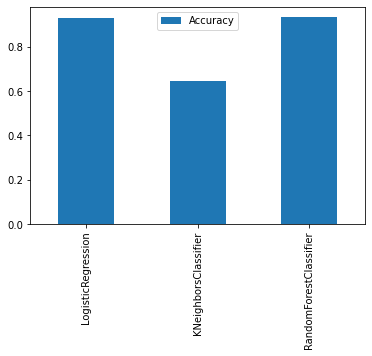

In [40]:
model_compare = pd.DataFrame(results, index=["Accuracy"])
model_compare.T.plot.bar()

## Hyperparameter tuning and Cross-validation

Each model we use has a series of dials we can turn to dictate how they perform. Changing these values may increase or decrease model performance.

To test different hyperparameters, we could use a validation set but since we don't have much data, we'll use cross-validation.

The most common type of cross-validation is k-fold. It involves splitting your data into k-fold's and then testing a model on each. Default value for k is 5

There are 3 ways to tune our hyperparameters
* By hand
* Using RandomizedSearchCV
* Using GridSearchCV

At first we will look how can we tune our hyperparameters in hand,
Lets try with the KneighborsClassifier model :)

### Tuning KNeighborsClassifier with hyperparameters by hand

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (n_neigbors=5).

KNN works by assuming dots which are closer together belong to the same class. If n_neighbors=5 then it assume a dot with the 5 closest dots around it are in the same class

Now,in here lets try a different n_neighbors

In [41]:
#create a list of train scores
train_scores = []

#create a list of test scores
test_scores = []

#Create a list of different values for n_neighbors
neighbors = np.arange(1, 21, 1)

#set the model
knn = KNeighborsClassifier()


for i in neighbors:
    #setting the hypermeter
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)#fitting the data
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the testing scores
    test_scores.append(knn.score(X_test, y_test))
    
np.array(train_scores[:20]), np.array(test_scores[:20])

(array([1.        , 0.85006353, 0.82973316, 0.78398983, 0.76493011,
        0.74968234, 0.7407878 , 0.71664549, 0.71283355, 0.70520966,
        0.69758577, 0.68742058, 0.68869123, 0.6797967 , 0.68360864,
        0.68869123, 0.66963151, 0.66581957, 0.66327827, 0.64930114]),
 array([0.6142132 , 0.6142132 , 0.65989848, 0.65482234, 0.64467005,
        0.59898477, 0.58883249, 0.58375635, 0.56345178, 0.62436548,
        0.56852792, 0.59390863, 0.55837563, 0.56345178, 0.56852792,
        0.6142132 , 0.57360406, 0.58375635, 0.58375635, 0.5786802 ]))

These data are actually tough to understand so lets plot a graph with this data

Max test score percentage of this model is 65.99


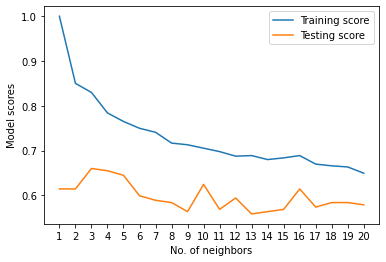

In [42]:
plt.plot(neighbors, train_scores, label="Training score")
plt.plot(neighbors, test_scores, label="Testing score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("No. of neighbors")
plt.ylabel("Model scores")
plt.legend()

print(f"Max test score percentage of this model is {max(test_scores)*100:.2f}")

Looking at the graph, n_neighbors = 5 seems best.

Even knowing this, the KNN's model performance didn't get upgraded(indeed remains same) near what LogisticRegression or the RandomForestClassifier did.

Because of this, we'll discard KNN and focus on the other two.

We've tuned KNN by hand but let's see how we can LogisticsRegression and RandomForestClassifier using RandomizedSearchCV.

Instead of us having to manually try different hyperparameters by hand, RandomizedSearchCV tries a number of different combinations, evaluates them and saves the best.

### Tuning with RandomizedSearchCV in logisticRegression

In [43]:
#setting up the hyperparameters for logistic regression
log_reg_rs = {"C": np.logspace(-4, 4, 20),
              "solver": ["liblinear", "newton-cg", "lbfgs"]}


#setting up the hyperparameters for random forest classifier
rf_rs = {"n_estimators": np.arange(10, 1000, 50),
         "max_depth": [None, 3, 5, 8, 10],
         "min_samples_split": np.arange(2, 40, 2),
         "min_samples_leaf": np.arange(1, 40, 2)}

Now let's use RandomizedSearchCV to try and tune our LogisticRegression model.

We'll pass it the different hyperparameters from log_reg_grid as well as set n_iter = 20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [44]:
np.random.seed(42)

Rs_cv = RandomizedSearchCV(LogisticRegression(),
                           param_distributions = log_reg_rs,
                           cv=5,
                           n_iter=20,
                           verbose=True)

Rs_cv.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ajaya\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ajaya\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ajaya\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ajaya\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ajaya\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477

In [45]:
Rs_cv.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [46]:
Rs_cv.score(X_test, y_test)

0.9390862944162437

### Tuning RandomForestClassifier by using RandomizedSearcchCV

In [47]:
np.random.seed(42)

rand_cv  = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_rs,
                              cv=5,
                              n_iter=20,
                              verbose=True)

rand_cv.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.9min finished


In [48]:
rand_cv.best_params_

{'n_estimators': 460,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': None}

In [49]:
rand_cv.score(X_test, y_test)

0.9238578680203046

### Tuning LogisticRegression using GridSearchCV

In [50]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished


In [51]:
gs_log_reg.best_params_

{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [52]:
gs_log_reg.score(X_test, y_test)

0.9390862944162437

Now, we can see here that our model has improved a little bit and has a good accuracy after we have tuned the hyperparameters
Both of the LogisticRegression and RandomForestClassifier gives a good accuracy and therefore both are the best fit models for 
this project but since Logistic Regression gives a bit higher score than the Random forest classifier therefore we can give more priority to use that model in this project

So this is how we have modelled our project and got an accuracy of above 92% that means that the model can predict 92% correct predictions out of 100%

This is the end of our modelling part, Now we are going to make predictions on our data and we will also be evaluating our model by some of the metrics..

## Evaluating our model 

In this section we will be evaluating our model based on the prediction it makes, we will be plotting ROC curve and calculate the AUC(Area under ROC curve) and lots of things to evaluate our model...

Now, lets make predictions on our data we can do that by calling predict() method

In [53]:
#lets predict our data
y_preds = gs_log_reg.predict(X_test)

In [54]:
y_preds # data our model predicted

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [55]:
np.array(y_test) # original data

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

From above it is clear that on the test data our model predicted almost predicted correct and now we can find the metrics we want

lets start with ROC curve and AUC score

### ROC Curve and AUC Score 

ROC curve is a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

Scikit-Learn implements a function plot_roc_curve(which we have already imported in the beginning) which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

We'll use the GridSearchCV version of our LogisticRegression estimator, gs_log_reg as well as the test data, X_test and y_test.

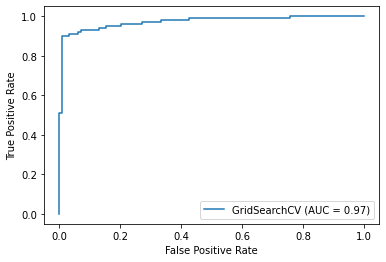

In [56]:
#lets plot roc curve
plot_roc_curve(gs_log_reg, X_test, y_test)

Our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

Let's move onto the next evaluation, a confusion matrix.

### Confusion Matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

In [57]:
k = confusion_matrix(y_test, y_preds)
k

array([[97,  2],
       [10, 88]], dtype=int64)

As this matrix is not that much attractive Lets make this matrix visual using sklearn's seaborn heatmap( which we have imported in the beginning)

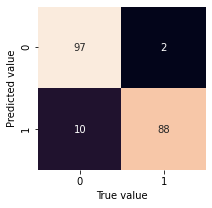

In [58]:
#lets make the matrix visual
#creating a function to plot the matrix

def confusion_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                          annot=True, #annote the boxes
                          cbar=False)
    plt.xlabel("True value")
    plt.ylabel("Predicted value")
    
confusion_mat(y_test, y_preds)

We can see the model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 3 occasaions where the model predicted 0 when it should've been 1 (false negative) and 10 occasions where the model predicted 1 instead of 0 (false positive)

### Classification report

We can create a classification report just by calling classification_report() and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [59]:
# Show classification report
classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.91      0.98      0.94        99\n           1       0.98      0.90      0.94        98\n\n    accuracy                           0.94       197\n   macro avg       0.94      0.94      0.94       197\nweighted avg       0.94      0.94      0.94       197\n'

* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

Now as we have seen the curves and few metrics lets go to cross validation 

We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

cross_val_score() works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.


In [60]:
#check best params
gs_log_reg.best_params_

{'C': 0.03359818286283781, 'solver': 'liblinear'}

In [61]:
# lets instantiate the model again with the best parameters we found in gridsearchcv
clf = LogisticRegression(C= 0.23357214690901212,solver= 'liblinear')

Now lets perform cross-validation in this model

In [62]:
#lets start with accuracy...
cross_acc = np.mean(cross_val_score(clf, X, y, cv=5, scoring="accuracy"))
cross_acc

0.915606547187403

In [63]:
#precision
cross_pre = np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision"))
cross_pre

0.9677918827105311

In [64]:
#f1_score
f1 = cross_pre = np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1"))
f1

0.9094497914565525

In [65]:
#recall score
recall = np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall"))
recall

0.8596784168212739

Now, lets visualize this metrics by plotting the bar graph

<AxesSubplot:title={'center':'accuracy scores'}>

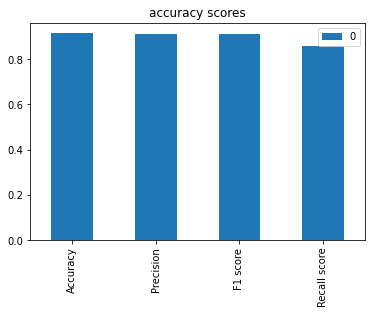

In [66]:
cv_metrics = pd.DataFrame({"Accuracy": cross_acc,
              "Precision": cross_pre,
              "F1 score": f1,
              "Recall score": recall}, index=[0])
cv_metrics.T.plot.bar(title="accuracy scores")

So yes! we're almost done with our project,
The final thing to check off the list of our model evaluation techniques is feature importance.

## Feature importance

Feature importance is actually which features contributing most to the outcomes of the model...

In our problem we are trying to predict Class(i.e which transaction is fraudulent and which is normal) using the principal component analysis, amount and other features,which charateristics contribute most to a model predicting whether the transaction is fraudulent or not?

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

Since we're using LogisticRegression, we'll look at one way we can calculate feature importance for it.

We'll use the coef_ attribute.

In [67]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [68]:
clf.coef_

array([[-2.34438130e-05, -1.04081503e-01,  1.87106134e-02,
        -3.77290904e-01,  4.65486187e-01,  2.21178668e-01,
        -1.18760984e-01, -1.75223835e-02, -2.07601354e-01,
        -1.22270249e-01, -1.84842363e-01,  1.25829030e-01,
        -2.28492566e-01, -1.03321798e-01, -5.91807388e-01,
        -8.38293079e-02, -6.87968534e-02,  4.89100989e-02,
         7.78072270e-02, -3.57473897e-02,  3.49849376e-02,
         4.69134787e-02,  1.06919787e-01,  6.77472491e-02,
        -1.71278974e-02, -3.43447489e-02, -3.96874594e-02,
        -1.26433536e-02,  1.78717508e-02,  1.50542383e-04]])

We cannot understand which features are which so lets visualize this ,so lets match features with columns

In [69]:
feat_dict = dict(zip(df.columns, clf.coef_[0]))
feat_dict

{'Time': -2.3443813043614797e-05,
 'V1': -0.10408150273260543,
 'V2': 0.018710613356886268,
 'V3': -0.37729090446306923,
 'V4': 0.4654861872549193,
 'V5': 0.22117866824030477,
 'V6': -0.1187609835599194,
 'V7': -0.01752238354397819,
 'V8': -0.2076013537092434,
 'V9': -0.12227024853774537,
 'V10': -0.18484236327310138,
 'V11': 0.12582902956729008,
 'V12': -0.2284925663726004,
 'V13': -0.10332179839489815,
 'V14': -0.5918073878322873,
 'V15': -0.08382930790264727,
 'V16': -0.06879685337882463,
 'V17': 0.04891009885573375,
 'V18': 0.077807226990121,
 'V19': -0.035747389676792606,
 'V20': 0.03498493760233344,
 'V21': 0.04691347865828126,
 'V22': 0.10691978726490249,
 'V23': 0.0677472490548386,
 'V24': -0.01712789740874259,
 'V25': -0.03434474890008433,
 'V26': -0.03968745936307287,
 'V27': -0.012643353616517788,
 'V28': 0.01787175079948594,
 'Amount': 0.00015054238329962604}

So in this way all features contributing values to the model
Now lets visulaize it by plotting it

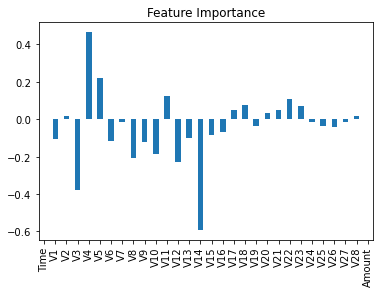

In [70]:
# Visualize feature importance
features_df = pd.DataFrame(feat_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

So some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

Let us again see the model predictions and actual values

In [71]:
#predictions of model on test data
y_preds

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [72]:
# Actual values
np.array(y_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

## Conclusion

So, yeah! We've completed this project so in this project at first we have performed an EDA and discovered that our dataset is imbalanced so we undersampled the data after that we have performed train test split and then we have used three models to check which model gives a good accuracy and we've got a good accuracy from the logisticRegression model with an overall score of 92% , so we have performed the rest of the work like evaluation of the model by logistic regression after tuning the hyperparameters, and in the evaluation we have performed all the metrics and also the cross validation score and then we had checked the feature importance that means which features contributed most to the outcome model.. and observed the results 

Our main goal is reached that is we made a model which has an overall score of above 92%..